In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass 
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

%matplotlib inline
password = getpass.getpass()
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

········


In [2]:
query='''select
r.rental_date, 
f.rental_duration,
SUBSTRING(r.rental_date, 1, 7) AS last_month, 
CASE WHEN SUBSTRING(r.rental_date, 1, 7) = '2006-02' THEN 1 ELSE 0 END AS Boolean_check,
f.length, 
f.rating,
f.film_id,
c.name


from rental r
left join inventory i
on r.inventory_id = i.inventory_id

left join film f
on i.film_id = f.film_id

left join film_category fc
on fc.film_id = f.film_id

left join category c
on c.category_id = fc.category_id

order by r.rental_date desc
;'''

In [3]:
data = pd.read_sql_query(query, engine)
data.head()

,rental_date,rental_duration,last_month,Boolean_check,length,rating,film_id,name
0,2022-02-08 19:44:26,6,2022-02,0,86,PG,1,Documentary
1,2006-02-14 15:16:03,6,2006-02,1,105,NC-17,998,Horror
2,2006-02-14 15:16:03,3,2006-02,1,171,PG-13,990,Horror
3,2006-02-14 15:16:03,4,2006-02,1,126,R,982,Action
4,2006-02-14 15:16:03,3,2006-02,1,85,R,977,Travel


In [4]:
data.isna().sum()

rental_date        0
rental_duration    0
last_month         0
Boolean_check      0
length             0
rating             0
film_id            0
name               0
dtype: int64

In [5]:
data.describe()


,rental_duration,Boolean_check,length,film_id
count,16045.000000,16045.000000,16045.000000,16045.000000
mean,4.935556,0.011343,114.969274,501.077719
std,1.401671,0.105902,40.101750,288.531551
min,3.000000,0.000000,46.000000,1.000000
25%,4.000000,0.000000,81.000000,255.000000
50%,5.000000,0.000000,114.000000,496.000000
75%,6.000000,0.000000,148.000000,753.000000
max,7.000000,1.000000,185.000000,1000.000000


In [6]:
data = data.set_index('film_id')
data


,rental_date,rental_duration,last_month,Boolean_check,length,rating,name
film_id,,,,,,,
1,2022-02-08 19:44:26,6,2022-02,0,86,PG,Documentary
998,2006-02-14 15:16:03,6,2006-02,1,105,NC-17,Horror
990,2006-02-14 15:16:03,3,2006-02,1,171,PG-13,Horror
982,2006-02-14 15:16:03,4,2006-02,1,126,R,Action
977,2006-02-14 15:16:03,3,2006-02,1,85,R,Travel
...,...,...,...,...,...,...,...
450,2005-05-24 23:05:21,5,2005-05,0,84,NC-17,Children
535,2005-05-24 23:04:41,6,2005-05,0,181,R,Horror
373,2005-05-24 23:03:39,7,2005-05,0,156,G,Children


In [7]:
data.dtypes

rental_date        datetime64[ns]
rental_duration             int64
last_month                 object
Boolean_check               int64
length                      int64
rating                     object
name                       object
dtype: object

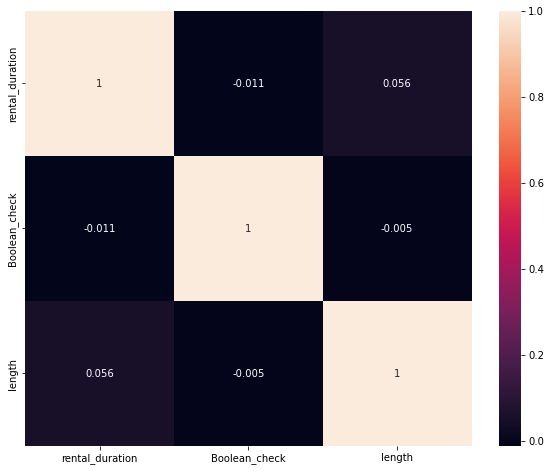

In [8]:
corr_matrix=data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


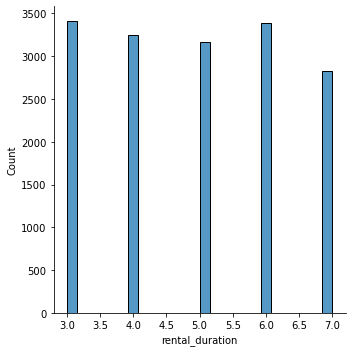

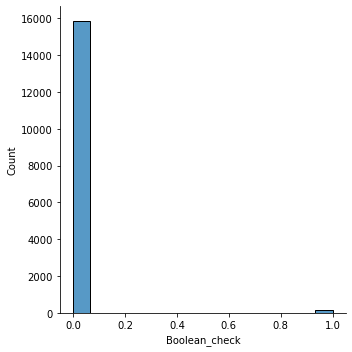

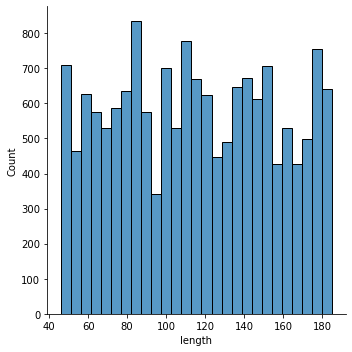

In [9]:
for col in data.select_dtypes(np.number):
    sns.displot(data[col])
    plt.show()


In [10]:
X = data.select_dtypes(include = np.number)

transformer = StandardScaler().fit(X)
x_normalized = transformer.transform(X)
data_num = pd.DataFrame(x_normalized)
data_num.columns = X.columns
data_num.head()

,rental_duration,Boolean_check,length
0,0.759434,-0.107113,-0.722417
1,0.759434,9.335917,-0.248607
2,-1.380935,9.335917,1.397258
3,-0.667478,9.335917,0.275077
4,-1.380935,9.335917,-0.747354


In [11]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

2005-07    6709
2005-08    5686
2005-06    2311
2005-05    1156
2006-02     182
2022-02       1
Name: last_month, dtype: int64 

PG-13    3585
NC-17    3293
PG       3213
R        3181
G        2773
Name: rating, dtype: int64 

Sports         1179
Animation      1166
Action         1112
Sci-Fi         1101
Family         1096
Drama          1060
Documentary    1051
Foreign        1033
Games           969
Children        945
Comedy          941
New             940
Classics        939
Horror          846
Travel          837
Music           830
Name: name, dtype: int64 



In [12]:
data_cat = data.select_dtypes(include = object)


In [13]:
data_cat

,last_month,rating,name
film_id,,,
1,2022-02,PG,Documentary
998,2006-02,NC-17,Horror
990,2006-02,PG-13,Horror
982,2006-02,R,Action
977,2006-02,R,Travel
...,...,...,...
450,2005-05,NC-17,Children
535,2005-05,R,Horror
373,2005-05,G,Children


In [15]:
data_cat = data_cat.drop(['last_month'], axis =1)

In [16]:
data_cat= pd.get_dummies(data_cat)
data_cat


,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Action,name_Animation,name_Children,name_Classics,name_Comedy,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
film_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
990,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
982,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
373,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y = data['Boolean_check'] 

In [18]:
y

film_id
1      0
998    1
990    1
982    1
977    1
      ..
450    0
535    0
373    0
333    0
80     0
Name: Boolean_check, Length: 16045, dtype: int64

In [19]:
data_num

,rental_duration,Boolean_check,length
0,0.759434,-0.107113,-0.722417
1,0.759434,9.335917,-0.248607
2,-1.380935,9.335917,1.397258
3,-0.667478,9.335917,0.275077
4,-1.380935,9.335917,-0.747354
...,...,...,...
16040,0.045978,-0.107113,-0.772291
16041,0.759434,-0.107113,1.646631
16042,1.472890,-0.107113,1.023197
16043,1.472890,-0.107113,0.275077


In [20]:
data_cat

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Action,name_Animation,name_Children,name_Classics,name_Comedy,...,name_Drama,name_Family,name_Foreign,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel
film_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
990,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
982,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
373,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X=data_cat.join(data_num)


In [22]:
X

,rating_G,rating_NC-17,rating_PG,rating_PG-13,rating_R,name_Action,name_Animation,name_Children,name_Classics,name_Comedy,...,name_Games,name_Horror,name_Music,name_New,name_Sci-Fi,name_Sports,name_Travel,rental_duration,Boolean_check,length
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.759434,9.335917,-0.248607
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.759434,9.335917,-0.248607
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.759434,9.335917,-0.248607
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.759434,9.335917,-0.248607
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.759434,9.335917,-0.248607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.472890,-0.107113,-0.747354
1000,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.472890,-0.107113,-0.747354
1000,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.472890,-0.107113,-0.747354
1000,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1.472890,-0.107113,-0.747354


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [24]:
classification = LogisticRegression(random_state=42, max_iter=500) 
classification.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [25]:
predictions = classification.predict(X_test)


In [26]:
pd.Series(predictions).value_counts()


0    4814
dtype: int64

In [28]:
y_test.value_counts()


0    4751
1      63
Name: Boolean_check, dtype: int64

<AxesSubplot:>

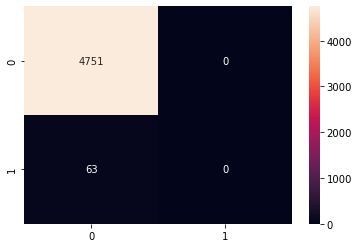

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True,fmt='g')

In [30]:

from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.99



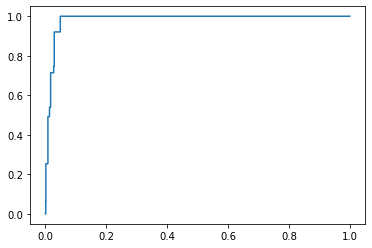

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)